In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df_train = pd.read_csv("fraudTrain.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df_train.shape

(1296675, 23)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### Let's Drop Unnecessary Columns

In [5]:
df_train.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
print(df_train.shape)

(1296675, 22)


In [7]:
df_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [8]:
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
df_train.drop(columns=['first', 'last','street','zip', 'lat','long','city_pop','trans_num','unix_time', 'merch_lat',
                        'merch_long'],axis=1,inplace=True)

In [10]:
print(df_train.shape)

(1296675, 11)


In [11]:
df_train.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,1978-06-21,0


### Changing Datatype of trans_date_trans_time & DOB

In [12]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])

df_train['dob'] = pd.to_datetime(df_train['dob'])

In [13]:
df_train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
state                    0
job                      0
dob                      0
is_fraud                 0
dtype: int64

In [14]:
df_train.duplicated().sum()

0

In [15]:
for feature in df_train.columns:
    if df_train[feature].dtype =='object':
        print(feature,"----->")
        print(df_train[feature].value_counts())
        print("\n")

merchant ----->
merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64


category ----->
category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64


gender ----->
gender
F    709863
M  

In [16]:
df_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
gender                         2
city                         894
state                         51
job                          494
dob                          968
is_fraud                       2
dtype: int64

In [17]:
df_train['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

### Let's create Age colume from DOB

In [18]:
import datetime as dt

In [19]:
df_train['Age'] = df_train['trans_date_trans_time'].dt.year - df_train['dob'].dt.year

In [20]:
# df_train['Age'] = dt.date.today().year - df_train['dob'].dt.year

In [21]:
df_train[['Age','dob','trans_date_trans_time']].head()

,Age,dob,trans_date_trans_time
0,31,1988-03-09,2019-01-01 00:00:18
1,41,1978-06-21,2019-01-01 00:00:44
2,57,1962-01-19,2019-01-01 00:00:51
3,52,1967-01-12,2019-01-01 00:01:16
4,33,1986-03-28,2019-01-01 00:03:06


### Let's Drop columns dob, cc_num  & Merchant

In [22]:
df_train.drop(columns=['cc_num','merchant','dob',],axis=1,inplace=True)

## Statistical Analysis of data

In [23]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
trans_date_trans_time,1296675,2019-10-03 12:47:28.070214144,2019-01-01 00:00:18,2019-06-03 19:12:22.500000,2019-10-03 07:35:47,2020-01-28 15:02:55.500000,2020-06-21 12:13:37,NaN
amt,1296675.0,70.351035,1.0,9.65,47.52,83.14,28948.9,160.316039
is_fraud,1296675.0,0.005789,0.0,0.0,0.0,0.0,1.0,0.075863
Age,1296675.0,46.029298,14.0,33.0,44.0,57.0,96.0,17.382373


### Exploratory Data Analysis

In [24]:
df_train.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city', 'state',
       'job', 'is_fraud', 'Age'],
      dtype='object')

### Outlier Detection

<Figure size 500x300 with 0 Axes>

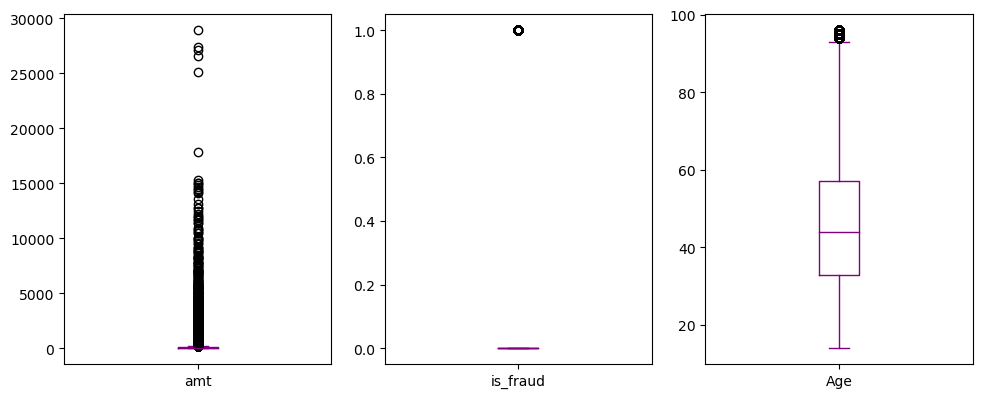

In [25]:
plt.figure(figsize=(5,3))
df_train.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='purple')
plt.show()

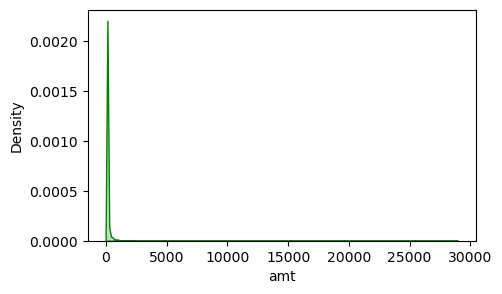

In [26]:
plt.figure(figsize=(5,3))
sns.kdeplot(df_train["amt"], fill=True,color='green');

* Higher values of amount is distorting the graph. So we fix it plotting only 0-99% of amount.

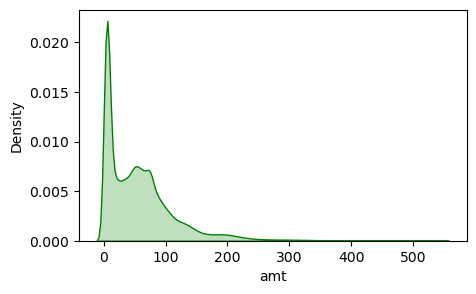

In [27]:
plt.figure(figsize=(5,3))
p99 = df_train["amt"].quantile(0.99)
sns.kdeplot(x="amt", data=df_train[df_train["amt"] <= p99], fill=True,color='green');

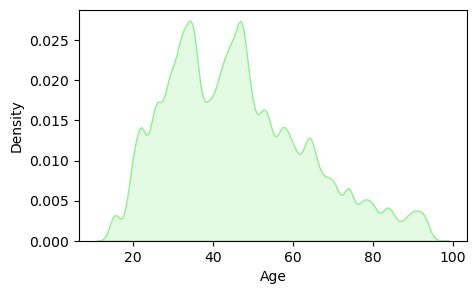

In [28]:
plt.figure(figsize=(5,3))
sns.kdeplot(df_train["Age"], fill=True,color='lightgreen');

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   job                    1296675 non-null  object        
 7   is_fraud               1296675 non-null  int64         
 8   Age                    1296675 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 84.1+ MB


In [30]:
cat_col = df_train.select_dtypes(include='object').columns
num_col = df_train.select_dtypes(include=['float64','int64','int32' ]).columns

In [31]:
cat_col

Index(['category', 'gender', 'city', 'state', 'job'], dtype='object')

In [32]:
num_col

Index(['amt', 'is_fraud'], dtype='object')

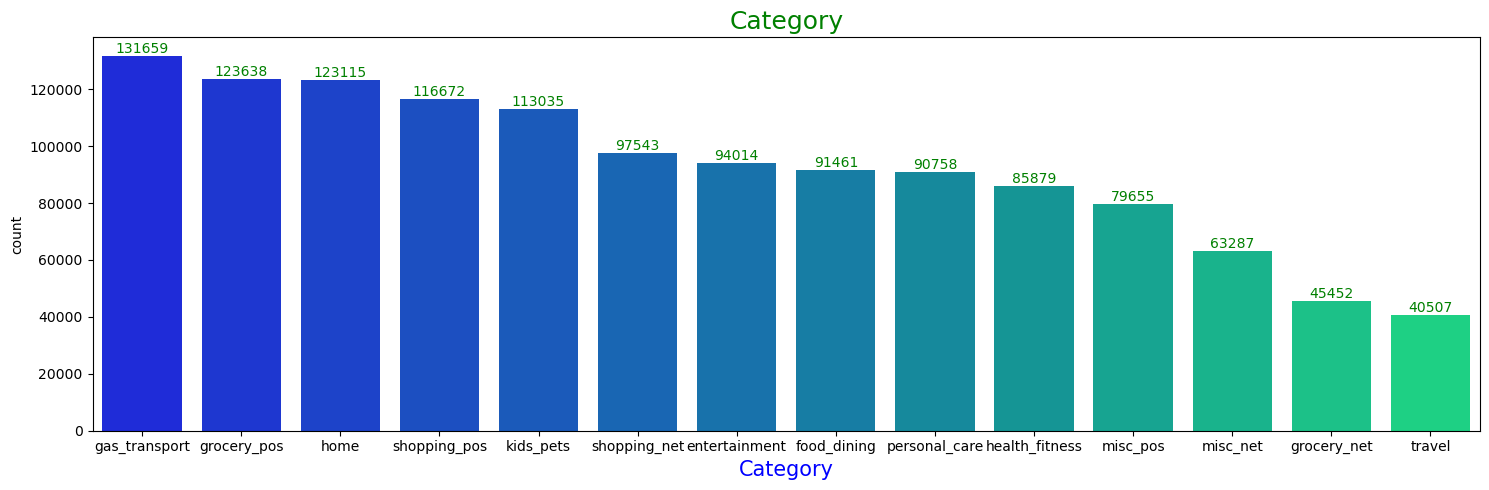

In [33]:
plt.figure(figsize=(15,5))
#fig,axes = plt.subplots(1,3)
#fig.set_size_inches(18,5)

ax=sns.countplot(x=df_train['category'],data=df_train,order=df_train['category'].value_counts().index,palette='winter')
for bars in ax.containers:
        ax.bar_label(bars,color='green',fontsize=10)
ax.set_title("Category",color='green',fontsize=18)
# ax.set_xticks(rotation=45)
ax.set_xlabel("Category",color='blue',fontsize=15)
plt.tight_layout()
plt.show()

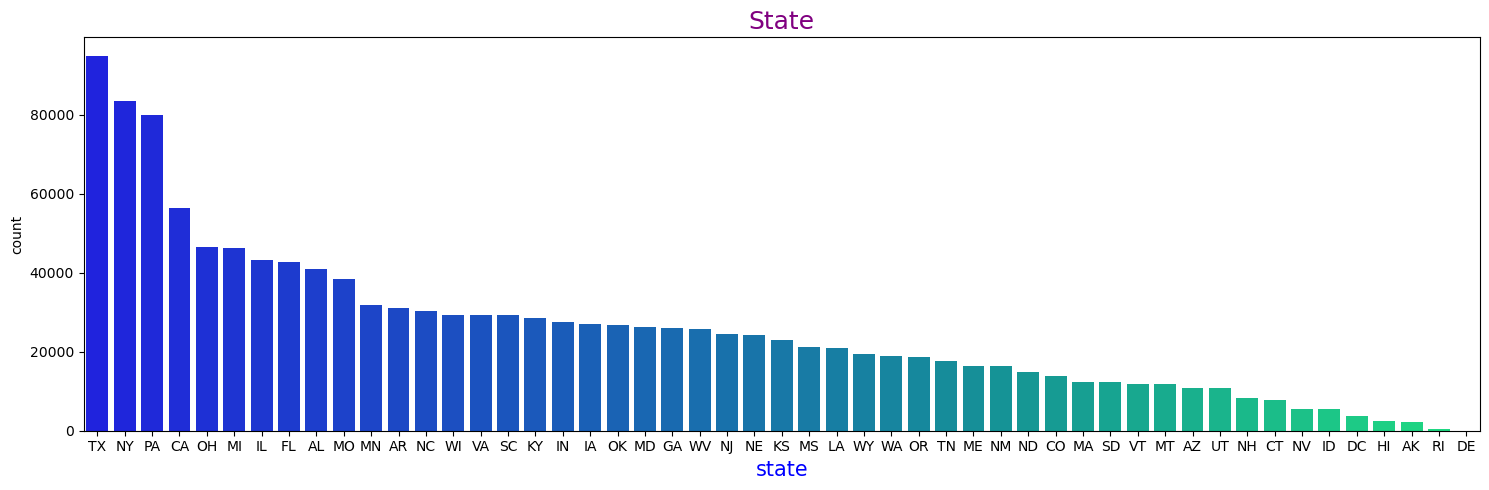

In [34]:
plt.figure(figsize=(15,5))
#fig,axes = plt.subplots(1,3)
#fig.set_size_inches(18,5)

ax=sns.countplot(x=df_train['state'],data=df_train,order=df_train['state'].value_counts().index,palette='winter')
#for bars in ax.containers:
 #       ax.bar_label(bars,color='green',fontsize=10)
ax.set_title("State",color='purple',fontsize=18)
# ax.set_xticks(rotation=45)
ax.set_xlabel("state",color='blue',fontsize=15)
plt.tight_layout()
plt.show()

In [35]:
df_train['job'].nunique()

494

In [36]:
df_train['city'].nunique()

894

### Distribution of Target Variable

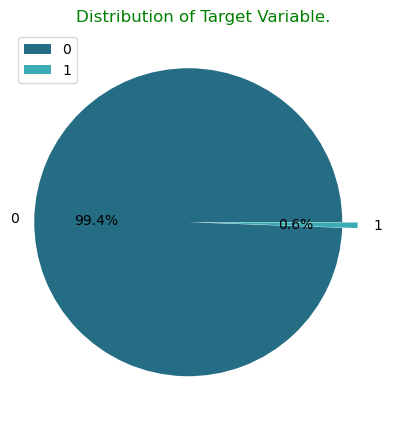

In [37]:
plt.figure(figsize=(5,5))
label = df_train['is_fraud'].value_counts().keys()
plt.pie(data=df_train,x=df_train['is_fraud'].value_counts(),labels=label,autopct="%.1f%%",explode=[0.1, 0],colors= ['#256D85', '#3BACB6'])
plt.title("Distribution of Target Variable.",color='green')
#print("Here 5 stands for High Score and 1 for Poor Score")
plt.legend(loc='upper left')     # loc='upper left'

plt.show()

* Target class is highly imbalanced.

<Axes: xlabel='gender', ylabel='count'>

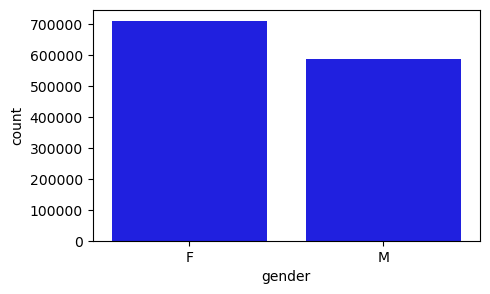

In [38]:
plt.figure(figsize=(5,3))
sns.countplot(x='gender',data=df_train,color='blue')

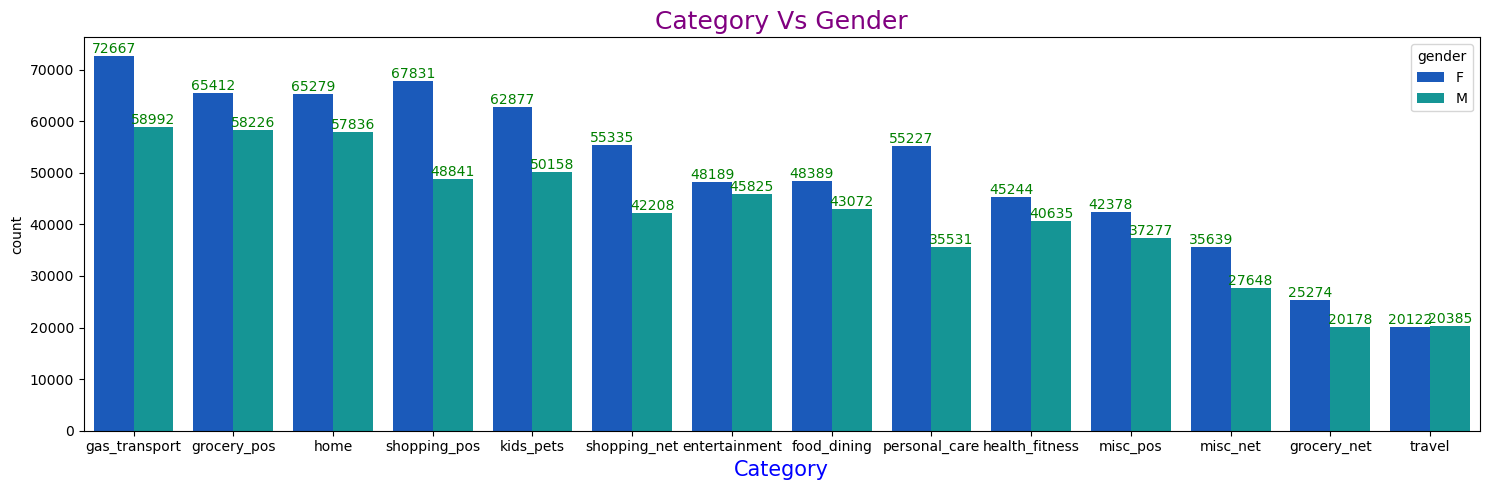

In [39]:
plt.figure(figsize=(15,5))
#fig,axes = plt.subplots(1,3)
#fig.set_size_inches(18,5)

ax=sns.countplot(x=df_train['category'],data=df_train,order=df_train['category'].value_counts().index,hue='gender',palette='winter')
for bars in ax.containers:
        ax.bar_label(bars,color='green',fontsize=10)
ax.set_title("Category Vs Gender",color='purple',fontsize=18)
# ax.set_xticks(rotation=45)
ax.set_xlabel("Category",color='blue',fontsize=15)
plt.tight_layout()
plt.show()

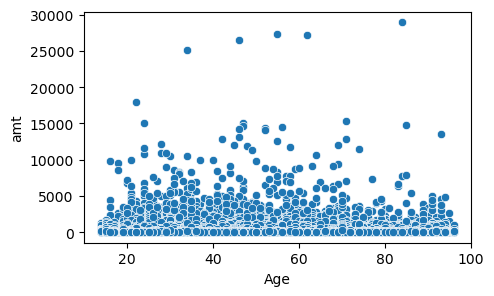

In [40]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Age',y='amt',data=df_train)
plt.show()

### Top 10 Job titles associated with Fraud

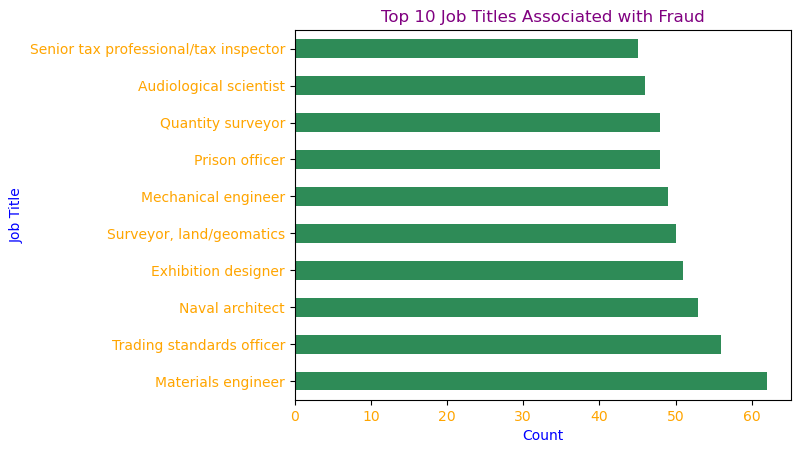

In [41]:
df_train[df_train["is_fraud"] == 1]["job"].value_counts().head(10).plot(kind = 'barh',color='seagreen')
plt.title('Top 10 Job Titles Associated with Fraud',color='purple')
plt.xlabel('Count',color='blue')
plt.ylabel('Job Title',color='blue')
plt.xticks(color='orange')
plt.yticks(color='orange')
plt.show()

### Top 10 Job titles associated with Not-Fraud

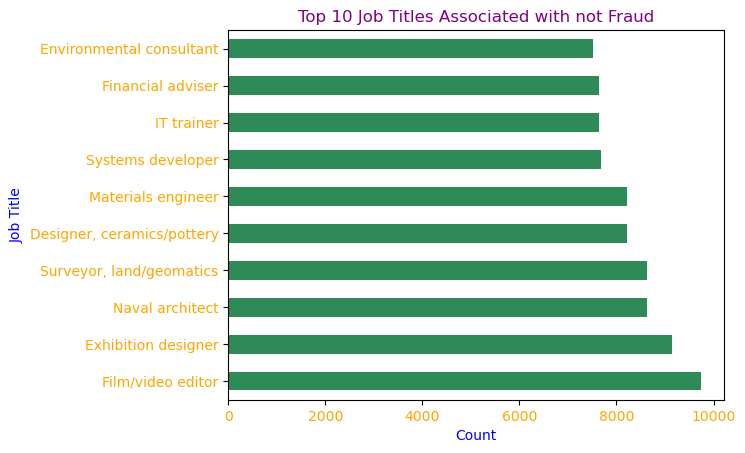

In [42]:
df_train[df_train["is_fraud"] == 0]["job"].value_counts().head(10).plot(kind = 'barh',color='seagreen')
plt.title('Top 10 Job Titles Associated with not Fraud',color='purple')
plt.xlabel('Count',color='blue')
plt.ylabel('Job Title',color='blue')
plt.xticks(color='orange')
plt.yticks(color='orange')
plt.show()

In [43]:
df_train['state'].head()

0    NC
1    WA
2    ID
3    MT
4    VA
Name: state, dtype: object

### Fraud Rate by State

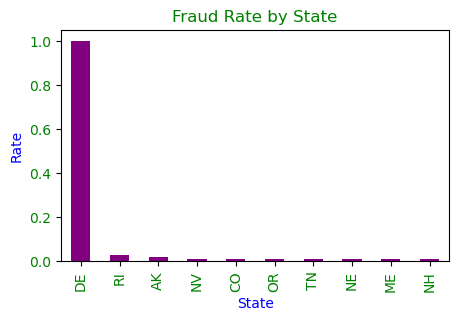

In [44]:
plt.figure(figsize=(5,3))
df_train.groupby('state')['is_fraud'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color='purple')
plt.title('Fraud Rate by State',color='green')
plt.xlabel('State',color='blue')
plt.ylabel('Rate',color='blue')
plt.xticks(color='green')
plt.yticks(color='green')
plt.show()

### Outlier Treatment

In [45]:
#Checking numbers of observations beyond Upper & Lower Limit
Outlier_col = ['Age','amt']
Q1 = df_train[Outlier_col].quantile(0.25)
Q3 = df_train[Outlier_col].quantile(0.75)
UL = Q3
LL = Q1
outliers = ((df_train[Outlier_col] > UL) | (df_train[Outlier_col] < LL)).sum()
print("Number of Observations Beyond Upper & Lower Limit for Each Column:")
display(outliers)

Number of Observations Beyond Upper & Lower Limit for Each Column:


Age    634905
amt    648067
dtype: int64

In [46]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [47]:
# Cap & floor the values beyond the outlier boundaries
#col = credit_df.drop['Default']
for i in Outlier_col:
    LL,UL = remove_outlier(df_train[i])
    df_train[i] = np.where(df_train[i] > UL,UL,df_train[i])
    df_train[i] = np.where(df_train[i] < LL,LL,df_train[i])

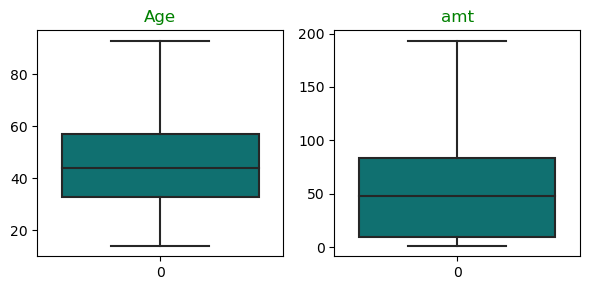

In [48]:
Outlier_col = ['Age','amt']
fig=plt.figure(figsize=(6,3))
#plt.suptitle('Boxplot Post Outlier Treatment', fontsize = 25,color='blue')
for i in range(0,len(Outlier_col)):
    plt.subplot(1,2,i+1)
    sns.boxplot(df_train[Outlier_col[i]],color='teal')
    plt.title(Outlier_col[i],color='green')
    #plt.title(cols[i],color='green')
fig.tight_layout()
plt.show()

### Data Encoding

In [49]:
cat_col

Index(['category', 'gender', 'city', 'state', 'job'], dtype='object')

In [50]:
df_train['job'].nunique()

494

### Let's drop column City , Job & trans_date_trans_time

In [51]:
df_train.drop(['city','job','trans_date_trans_time'],axis=1,inplace=True)

In [52]:
cat_col = ['category', 'gender','state']

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label_encoder = LabelEncoder()
for column in cat_col:
    df_train[column] = label_encoder.fit_transform(df_train[column])
   # df_test[column] = label_encoder.fit_transform(df_test[column])

In [55]:
df_train.head()

,category,amt,gender,state,is_fraud,Age
0,8,4.970,0,27,0,31.0
1,4,107.230,0,47,0,41.0
2,0,193.375,1,13,0,57.0
3,2,45.000,1,26,0,52.0
4,9,41.960,1,45,0,33.0


### Treating target imbalance using SMOTE

In [56]:
from imblearn.over_sampling import SMOTE 

In [57]:
X = df_train.drop('is_fraud',axis=1)
y = df_train['is_fraud']

In [58]:
print(X.shape)
print(y.shape)

(1296675, 5)
(1296675,)


In [59]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [60]:
X_res.shape

(2578338, 5)

In [61]:
y_res.shape

(2578338,)

In [62]:
y_res.value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

### Train - Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.30,random_state=42)

In [65]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train : (1804836, 5)
Shape of X_test : (773502, 5)
Shape of y_train : (1804836,)
Shape of y_test : (773502,)


In [66]:
X_train.head(2)

,category,amt,gender,state,Age
1119765,10,191.97,1,35,84.0
1032328,7,2.98,0,31,85.0


### Feature Transformation

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
sc = MinMaxScaler()

In [69]:
X_train_sc = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [70]:
y_train.head()

1119765    0
1032328    0
1236826    0
307127     0
2143356    1
Name: is_fraud, dtype: int64

In [71]:
print("Shape of X_train :",X_train_sc.shape)
print("Shape of X_test :",X_test_sc.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train : (1804836, 5)
Shape of X_test : (773502, 5)
Shape of y_train : (1804836,)
Shape of y_test : (773502,)


In [72]:
X_train_sc.head(2)

,category,amt,gender,state,Age
0,0.769231,0.992697,1.0,0.70,0.886076
1,0.538462,0.010292,0.0,0.62,0.898734


In [73]:
X_test_sc.head(2)

,category,amt,gender,state,Age
0,0.923077,0.035971,0.0,0.12,0.518987
1,0.461538,0.367823,1.0,0.68,0.392405


### Model Building

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Logistic Regression Model

In [75]:
lgt = LogisticRegression(random_state=4)
lgt.fit(X_train_sc,y_train)

LogisticRegression(random_state=4)

#### Accuracy of Training and Test Data.

In [76]:
print("Accuracy of the Training Data: ",lgt.score(X_train_sc,y_train))
print("Accuracy of the Test Data: ",lgt.score(X_test_sc,y_test))

Accuracy of the Training Data:  0.8079759047359427
Accuracy of the Test Data:  0.8078647501881056


In [77]:
ypred_train = lgt.predict(X_train_sc)
ypred_test = lgt.predict(X_test_sc)

### Comparison Table¶

In [78]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Logistic Regression'])
resultsDf

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.807976,0.807865,0.827348,0.778628,0.802249


### Applying GridSearchCV for Logistic Regression:

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
grid = {'penalty':['l2'],
        'solver':['newton-cg','liblinear','lbfgs','sag'],
        'tol':[0.0001,0.00001]}
grid_search = GridSearchCV(estimator=lgt,param_grid=grid,cv=10,n_jobs=-1,scoring='f1',verbose=1)
grid_search.fit(X_train_sc,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=4), n_jobs=-1,
             param_grid={'penalty': ['l2'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1', verbose=1)

In [81]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(random_state=4)


In [82]:
best_model_lgt = grid_search.best_estimator_
best_model_lgt.fit(X_train_sc,y_train)

LogisticRegression(random_state=4)

In [83]:
print("Accuracy on Train Data: ",best_model_lgt.score(X_train_sc,y_train))
print("Accuracy on Test Data: ",best_model_lgt.score(X_test_sc,y_test))

Accuracy on Train Data:  0.8079759047359427
Accuracy on Test Data:  0.8078647501881056


In [84]:
ypred_train = best_model_lgt.predict(X_train_sc)
ypred_test = best_model_lgt.predict(X_test_sc)

In [85]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Logistic Regression Tuned'])
comp_table = pd.concat([resultsDf,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.807976,0.807865,0.827348,0.778628,0.802249
Logistic Regression Tuned,0.807976,0.807865,0.827348,0.778628,0.802249


### Decission Tree Classifier

In [86]:
dt = DecisionTreeClassifier(random_state=4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=4)

#### Accuracy of the Train and Test data

In [87]:
print("Accuracy Score for Training Data is: ", dt.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", dt.score(X_test, y_test))

Accuracy Score for Training Data is:  0.9948017437595438
Accuracy Score for Test Data is:  0.990334866619608


In [88]:
ypred_train = dt.predict(X_train)
ypred_test = dt.predict(X_test)

In [89]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Decission Tree'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.807976,0.807865,0.827348,0.778628,0.802249
Logistic Regression Tuned,0.807976,0.807865,0.827348,0.778628,0.802249
Decission Tree,0.994802,0.990335,0.985728,0.995098,0.990391


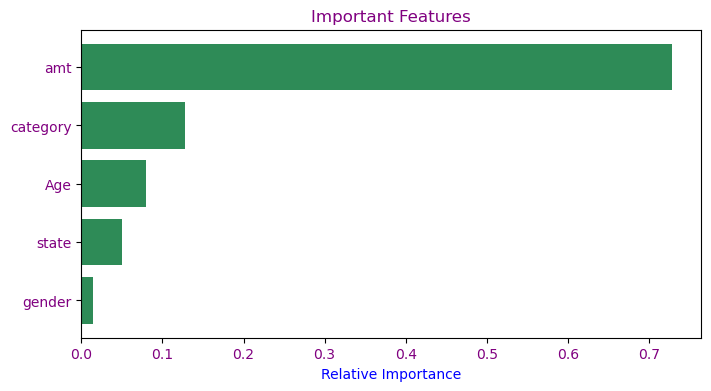

In [91]:
imp = dt.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))

plt.barh(range(len(indices)), imp[indices], color="seagreen", align="center")
plt.title("Important Features",color='purple')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

### Random Forest

In [93]:
rf = RandomForestClassifier(n_estimators=500,random_state=4)      # 100, 500, 1000, 2000,5000
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=4)

#### Accuracy of Train and Test data

In [94]:
print("Accuracy on Training data: ",rf.score(X_train,y_train))
print("Accuracy on Test data: ",rf.score(X_test,y_test))

Accuracy on Training data:  0.9948017437595438
Accuracy on Test data:  0.9919224513963765


In [95]:
ypred_train = rf.predict(X_train)
ypred_test = rf.predict(X_test)

In [96]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test),
                          'Precision': precision_score(y_test, ypred_test),
                          'Recall': recall_score(y_test, ypred_test),
                          'f1-score': f1_score(y_test, ypred_test)},index=['Random Forest'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy,Precision,Recall,f1-score
Logistic Regression,0.807976,0.807865,0.827348,0.778628,0.802249
Logistic Regression Tuned,0.807976,0.807865,0.827348,0.778628,0.802249
Decission Tree,0.994802,0.990335,0.985728,0.995098,0.990391
Random Forest,0.994802,0.991922,0.987120,0.996870,0.991971


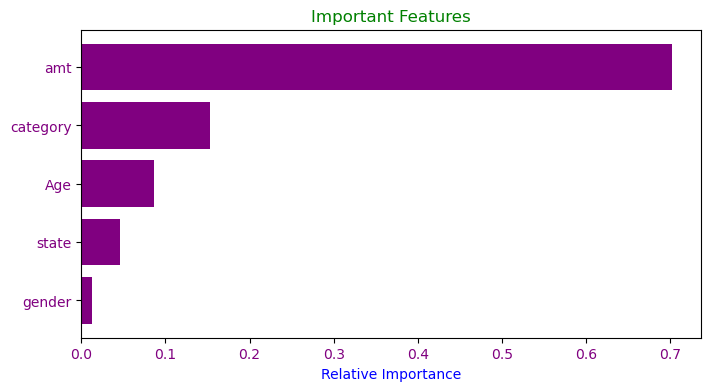

In [97]:
imp = rf.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))

plt.barh(range(len(indices)), imp[indices], color="purple", align="center")
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

### Performance metrices of the most optimal model:


In [100]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


**Clasdification Report**

In [101]:
print('Classification Report of the Training data:\n\n',classification_report(y_train,ypred_train),'\n')
print('Classification Report of the Test data:\n\n',classification_report(y_test,ypred_test))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99    902835
           1       0.99      1.00      0.99    902001

    accuracy                           0.99   1804836
   macro avg       0.99      0.99      0.99   1804836
weighted avg       0.99      0.99      0.99   1804836
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99    386334
           1       0.99      1.00      0.99    387168

    accuracy                           0.99    773502
   macro avg       0.99      0.99      0.99    773502
weighted avg       0.99      0.99      0.99    773502



**Confusion Matrix**

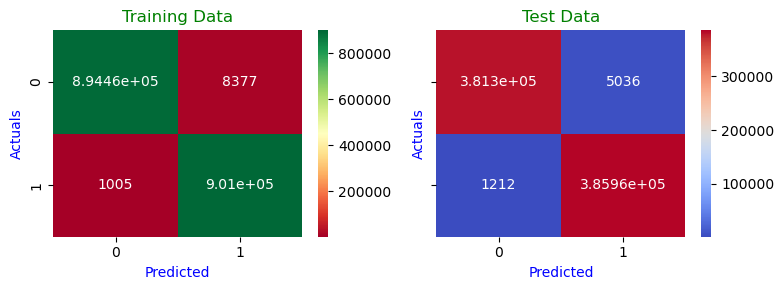

In [102]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ypred_train)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')


#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ypred_test)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 1.000
AUC for the Test Data: 0.999


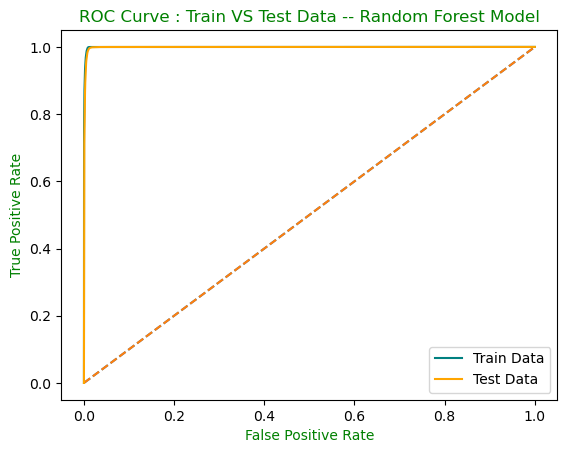

In [103]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = rf.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = rf.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data -- Random Forest Model",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

### Insights

* Most Optimum model is Random forest.
* Train Accuracy and Test Accuracy both are same approx 99%.
* Also, Precision, Recall & F1-score are very good.